# Задание №2 #
Вычислить **максимальное** значение функции f(x) на отрезке [a,b],  
используя  следующие методы первого порядка:  
* метод установления границ интервала (метод Свенна);
* метод половинного деления;
* метод золотого сечения;
* метод равномерного поиска;

Точку оптимума x' определить с точностью не менее 10^-4.  
Построить график функции *f(x)* на отрезке. Указать число шагов,  
при котором достигается требуемая точность.
 
8) *f(x) = 1/3 * x^3 - (1 + x)(ln(1 + x) - 1)*,
на интервале: [-0,5; 0,5]

***

Построим график функции


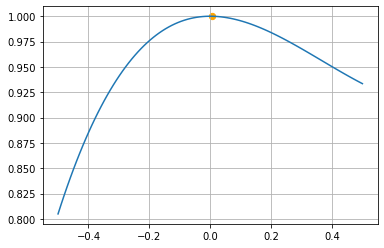

In [165]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3) * x**3 - (1 + x) * (np.log(1 + x) - 1)

a, b = [-0.5, 0.5]

x = np.linspace(a, b, 100)
f_x = f(x)

fig = plt.subplot()
fig.plot(x, f_x)
fig.grid()

i_max = np.argmax(f_x)
f_max = f_x[i_max]
x_max = x[i_max]

fig.scatter(x_max, f_max, color='orange', s=40, marker='o')


***
Найдем максимум функции методом Свенна

In [166]:
eps = 10**(-5)

x0 = a
x1 = b

sven_counter = 0
while(np.abs(x1 - x0) > eps):
    xn = (x0 + x1)/2
    d = np.abs(x1 - x0)/10

    is_d_negative = False

    f_l = f(xn - d)
    f_xn = f(xn)
    f_r = f(xn + d)
    
    if(f_l <= f_xn and f_xn >= f_r):
        x0 = xn - d
        x1 = xn + d
    else:
        if(f_l <= f_xn and f_xn <= f_r):
            x0 = xn
        elif(f_l >= f_xn and f_xn >= f_r):
            d = -d
            is_d_negative = True
            x1 = xn

    while(True):
        sven_counter += 1
        xn1 = xn + d
        if(f(xn1) < f(xn)):
            if (is_d_negative):
                x0 = xn1
                x1 = xn
            else:
                x1 = xn1
            break
        else:
            if(not is_d_negative):
                x0 = xn
            d *= 2


res = (x0 + x1) / 2
f_res = f(res)

#Функция для вывода digits чисел после запятой
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

print('Максимум f(x) =', toFixed(f_res, 5), ' при x =', toFixed(res, 5))
print('Количество итераций:', sven_counter)



Максимум f(x) = 1.00000  при x = 0.00000
Количество итераций: 8


***
Найдем максимум методом половинного деления

In [167]:
x0 = a
x1 = b 

mid = (x0 + x1)/2
f_mid = f(mid)

bin_counter = 0
while(np.abs(x1 - x0) > eps):
    mid = (x0 + x1)/2
    f_mid = f(mid)

    n = (x0 + mid)/2
    m = (mid + x1)/2

    f_n = f(n)
    f_m = f(m)

    if(f_n > f_mid):
        x1 = mid
    elif(f_m > f_mid):
        x0 = mid
    elif(f_n <= f_mid and f_m <= f_mid):
        x0 = n
        x1 = m
    bin_counter += 1

print('Максимум f(x) =', toFixed(f_mid, 5), ' при x =', toFixed(mid, 5))
print('Количество итераций:', bin_counter)


Максимум f(x) = 1.00000  при x = 0.00000
Количество итераций: 17


***
Найдем максимум методом золотого сечения 

In [168]:
x0 = a
x1 = b

phi = (1 + np.sqrt(5))/2
gold_counter = 0

while(np.abs(x1 - x0) > eps):
    n = x1 - (x1 - x0)/phi
    m = x0 + (x1 - x0)/phi

    f_n = f(n)
    f_m = f(m)

    if(f_n <= f_m):
        x0 = n
    else:
        x1 = m

    gold_counter += 1

res = (x0 + x1)/2
f_res = f(res)

print('Максимум f(x) =', toFixed(f_res, 5), ' при x =', toFixed(res, 5))
print('Количество итераций:', gold_counter)

Максимум f(x) = 1.00000  при x = 0.00000
Количество итераций: 24


***
Найдем максимум методом равномерного поиска

In [169]:
x0 = a
f_x0 = f(x0)

uniform_counter = 0
i = 0
while (True):
    x_i = x0 + eps
    f_i = f(x_i)

    if(x_i == b):
        break
    
    if(f_i > f_x0):
        x0  = x_i
        f_x0 = f_i

    if(f_i < f_x0):
        break
    
    uniform_counter += 1

print('Максимум f(x) =', toFixed(f_x0, 5), ' при x =', toFixed(x0, 5))
print('Количество итераций:', uniform_counter)       

Максимум f(x) = 1.00000  при x = 0.00000
Количество итераций: 50000


***
Составим таблицу количества итераций, сделанных каждым  
методом для поиска максимума

In [180]:
from prettytable import PrettyTable

counter_names = ['', 'Метод Свенна', 'Метод половинного деления', 
    'Метод золотого сечения', 'Метод равномерного поиска']

counter_vals = ['Кол-во \n итераций', sven_counter, bin_counter,
    gold_counter, uniform_counter]

table = PrettyTable(counter_names)
table.add_row(counter_vals)
print(table)

+-----------+--------------+---------------------------+------------------------+---------------------------+
|           | Метод Свенна | Метод половинного деления | Метод золотого сечения | Метод равномерного поиска |
+-----------+--------------+---------------------------+------------------------+---------------------------+
|  Кол-во   |      8       |             17            |           24           |           50000           |
|  итераций |              |                           |                        |                           |
+-----------+--------------+---------------------------+------------------------+---------------------------+
